In [1]:
import scanpy as sc
import pertpy as pt
import matplotlib.pyplot as plt


In [2]:
# 加载您的数据到 AnnData 对象，这里假设为 'adata'
# 请替换以下代码为您的实际数据加载步骤
adata = sc.read_h5ad("../../results/anndata_annotation_harmony_celltypist.h5ad")

adata

AnnData object with n_obs × n_vars = 64354 × 2000
    obs: 'C0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_antibody', 'nFeature_antibody', 'patients', 'sampletag', 'organs', 'percent.mt', 'percent.ribo', 'log10GenesPerUMI', 'batch', 'integrated_snn_res.0.5', 'seurat_clusters', 'samples', 'doublet.score', 'predicted.doublet', 'cluster', 'doublet', 'patients_organ', 'sample', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier', 'discard', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0_25', 'leiden_0_5', 'leiden_1', 'leiden_2', 'celltypist_cell_label_fine'

In [3]:
# 定义您的分组列和细胞类型注释列名称
GROUP_COL = "group"  # 替换为您的实际分组列名，例如 'ctrl' 和 'stim'
ANNO_COL = "celltypist"  # 替换为您的实际细胞类型列名
SIMPLE_COL = "patients_organ"
GROUP_CONTROL = "CNL"
GROUP_STIM = "CCL"

In [4]:

# 确保您的分组和细胞类型列存在于 adata.obs 中
if GROUP_COL not in adata.obs.columns or ANNO_COL not in adata.obs.columns:
    raise ValueError(f"确保 {GROUP_COL} 和 {ANNO_COL} 存在于 adata.obs 中。")

# 打印分组和细胞类型信息
print(adata.obs[[GROUP_COL, ANNO_COL]].head())


     group   celltypist
929    CCL           DC
967    CCL  Macrophages
987    CCL      T cells
1000   CCL  Macrophages
1007   CCL  Macrophages


In [5]:
# 初始化 Milo 分析对象
milo = pt.tl.Milo()
mdata = milo.load(adata)

# 构建 KNN 图
sc.pp.neighbors(mdata["rna"], use_rep="X_pca", n_neighbors=150)  # 根据需要调整参数

# 构建邻域
milo.make_nhoods(mdata["rna"], prop=0.1)

In [6]:
mdata = milo.count_nhoods(mdata, sample_col=SIMPLE_COL)
mdata

MuData object with n_obs × n_vars = 64354 × 2000
  2 modalities
    rna:	64354 x 2000
      obs:	'C0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_antibody', 'nFeature_antibody', 'patients', 'sampletag', 'organs', 'percent.mt', 'percent.ribo', 'log10GenesPerUMI', 'batch', 'integrated_snn_res.0.5', 'seurat_clusters', 'samples', 'doublet.score', 'predicted.doublet', 'cluster', 'doublet', 'patients_organ', 'sample', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier', 'discard', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0_25', 'leiden_0_5', 'leiden_1', 'leiden_2', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'celltypist', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'batch_colors', 'celltypist_cell_label_fine_colors', 'group_colors', 'hvg', 'leiden', 'leiden_0_25_colors', 'leiden_0_5_colors', 'leiden_1_colors', 'leiden_2_colors', 'leiden_colors', 'neighbors', 'pca', 'scrublet', 'tsne', 'umap', 'nhood_neighbors_key'
      obsm:	'X_pca', 'X_pca_harmony', 'X_tsne', 'X_umap', 'nhoods'
      varm:	'PCs'
      layers:	'counts', 'log1p_norm', 'sqrt_norm'
      obsp:	'connectivities', 'distances'
    milo:	11 x 1821
      var:	'index_cell', 'kth_distance'
      uns:	'sample_col'

In [12]:
adata.obs["patients_organ"].unique()

['CCL_s0920', 'CCL_s1125', 'CNL_s1125', 'CCL_s1231', 'CNL_s1231', ..., 'CNL_s0107', 'CCL_s0115', 'CNL_s0115', 'CCL_s0813', 'CNL_s0813']
Length: 11
Categories (11, object): ['CCL_s0107', 'CCL_s0115', 'CCL_s0813', 'CCL_s0920', ..., 'CNL_s0115', 'CNL_s0813', 'CNL_s1125', 'CNL_s1231']

In [7]:
# (by default, the last category is taken as the condition of interest)
# 这里的样本指的是单个独立分组的样本
mdata["rna"].obs[GROUP_COL] = (
    mdata["rna"].obs[GROUP_COL].cat.reorder_categories([GROUP_CONTROL, GROUP_STIM])
)
milo.da_nhoods(mdata, design="~group")

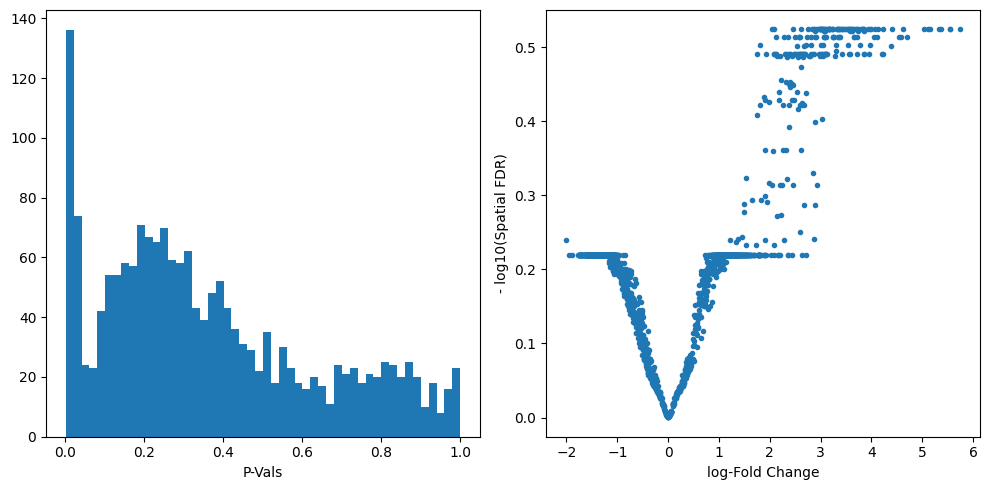

In [14]:
import numpy as np
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [10, 5]
plt.subplot(1, 2, 1)
plt.hist(mdata["milo"].var.PValue, bins=50)
plt.xlabel("P-Vals")
plt.subplot(1, 2, 2)
plt.plot(mdata["milo"].var.logFC, -np.log10(mdata["milo"].var.SpatialFDR), ".")
plt.xlabel("log-Fold Change")
plt.ylabel("- log10(Spatial FDR)")
plt.tight_layout()
plt.rcParams["figure.figsize"] = old_figsize

In [8]:
milo.build_nhood_graph(mdata)

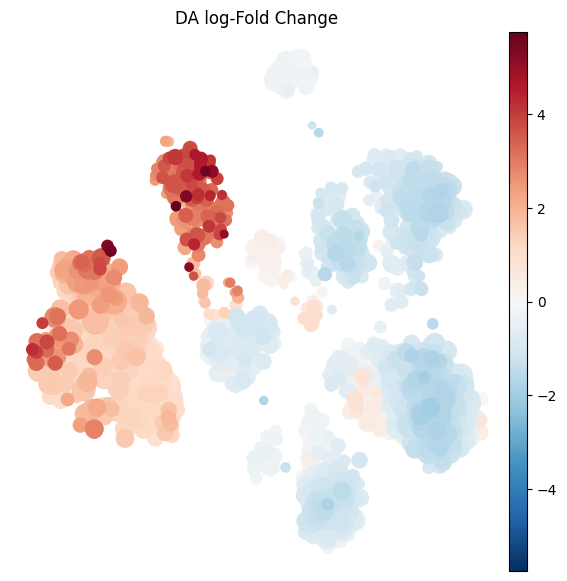

In [11]:
milo.plot_nhood_graph(
    mdata,
    alpha=1,  ## SpatialFDR level (1%)
    min_size=1,  ## Size of smallest dot
    save="xx.pdf"
)

In [12]:

# 注释邻域（按照主要的细胞类型）
milo.annotate_nhoods(mdata, anno_col=ANNO_COL)


Text(0.5, 0, 'celltype fraction')

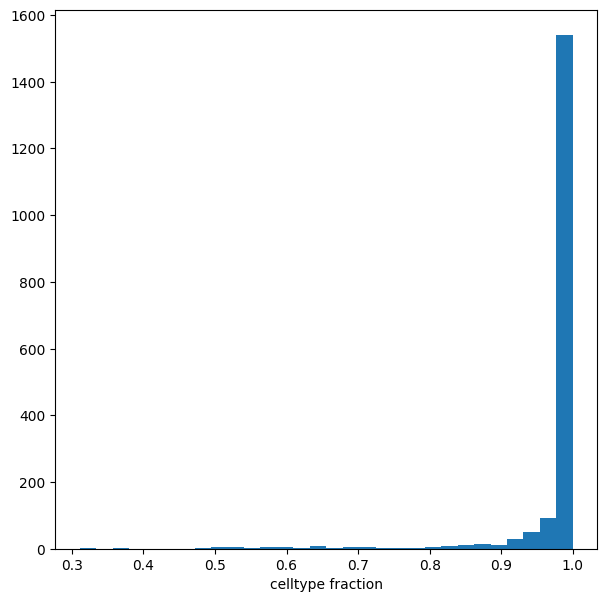

In [18]:
plt.hist(mdata["milo"].var["nhood_annotation_frac"], bins=30)
plt.xlabel("celltype fraction")

In [13]:
# Ensure 'nhood_annotation' is a categorical type
mdata["milo"].var["nhood_annotation"] = (
    mdata["milo"].var["nhood_annotation"].astype("category")
)

# Add the new category 'Mixed'
mdata["milo"].var["nhood_annotation"] = (
    mdata["milo"].var["nhood_annotation"].cat.add_categories("Mixed")
)

# Now make the assignment
mdata["milo"].var.loc[
    mdata["milo"].var["nhood_annotation_frac"] < 0.6, "nhood_annotation"
] = "Mixed"

# 去除未使用的类别
mdata["milo"].var["nhood_annotation"] = (
    mdata["milo"].var["nhood_annotation"].cat.remove_unused_categories()
)

In [14]:
mdata

MuData object with n_obs × n_vars = 64354 × 2000
  2 modalities
    rna:	64354 x 2000
      obs:	'C0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_antibody', 'nFeature_antibody', 'patients', 'sampletag', 'organs', 'percent.mt', 'percent.ribo', 'log10GenesPerUMI', 'batch', 'integrated_snn_res.0.5', 'seurat_clusters', 'samples', 'doublet.score', 'predicted.doublet', 'cluster', 'doublet', 'patients_organ', 'sample', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier', 'discard', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0_25', 'leiden_0_5', 'leiden_1', 'leiden_2', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'celltypist', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'batch_colors', 'celltypist_cell_label_fine_colors', 'group_colors', 'hvg', 'leiden', 'leiden_0_25_colors', 'leiden_0_5_colors', 'leiden_1_colors', 'leiden_2_colors', 'leiden_colors', 'neighbors', 'pca', 'scrublet', 'tsne', 'umap', 'nhood_neighbors_key'
      obsm:	'X_pca', 'X_pca_harmony', 'X_tsne', 'X_umap', 'nhoods'
      varm:	'PCs'
      layers:	'counts', 'log1p_norm', 'sqrt_norm'
      obsp:	'connectivities', 'distances'
    milo:	11 x 1821
      obs:	'group', 'patients_organ'
      var:	'index_cell', 'kth_distance', 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'SpatialFDR', 'Nhood_size', 'nhood_annotation', 'nhood_annotation_frac'
      uns:	'sample_col', 'nhood', 'annotation_labels', 'annotation_obs'
      varm:	'X_milo_graph', 'frac_annotation'
      varp:	'nhood_connectivities'

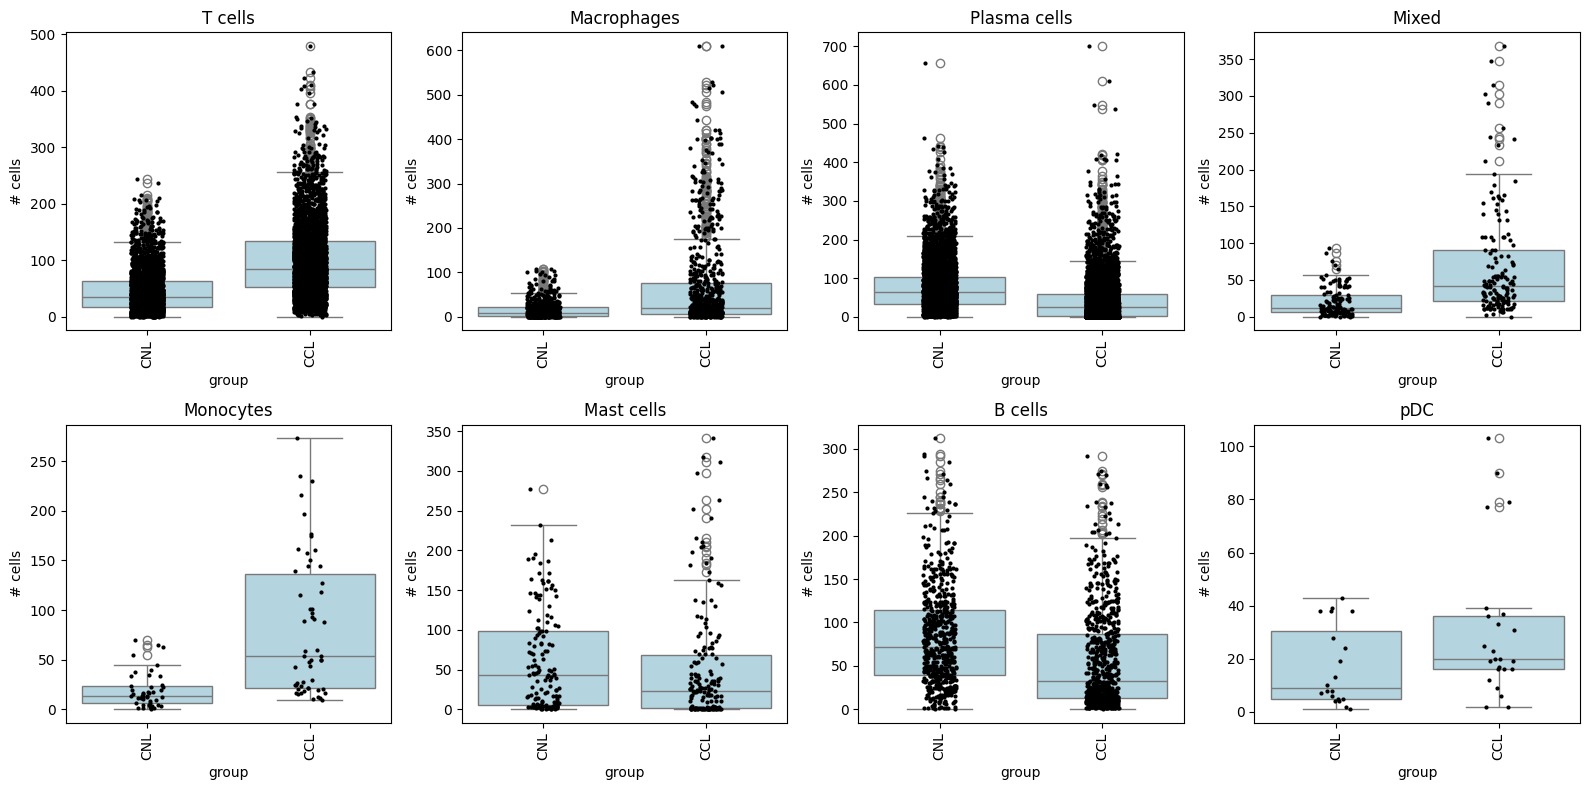

In [ ]:
import matplotlib.pyplot as plt
import math

# 假设 cell_types 是一个包含所有细胞类型的列表
cell_types = mdata["milo"].var["nhood_annotation"].unique()

# 动态计算行数和列数
num_types = len(cell_types)
cols = 4
rows = math.ceil(num_types / cols)

# 设置画板大小
plt.figure(figsize=(cols * 4, rows * 4))

for i, cell_type in enumerate(cell_types):
    # 按细胞类型筛选邻域
    cell_nhoods = mdata["milo"].var_names[
        (mdata["milo"].var["nhood_annotation"] == cell_type)
    ]

    plt.subplot(rows, cols, i + 1)
    # 删除点并只绘制箱线图
    milo.plot_nhood_counts_by_cond(
        mdata,
        test_var="group",
        subset_nhoods=cell_nhoods,
        log_counts=False,
    )
    plt.title(f"{cell_type}")

plt.tight_layout()

# 保存图像
plt.savefig("nhood_counts_by_cell_type.pdf", dpi=300)

plt.show()

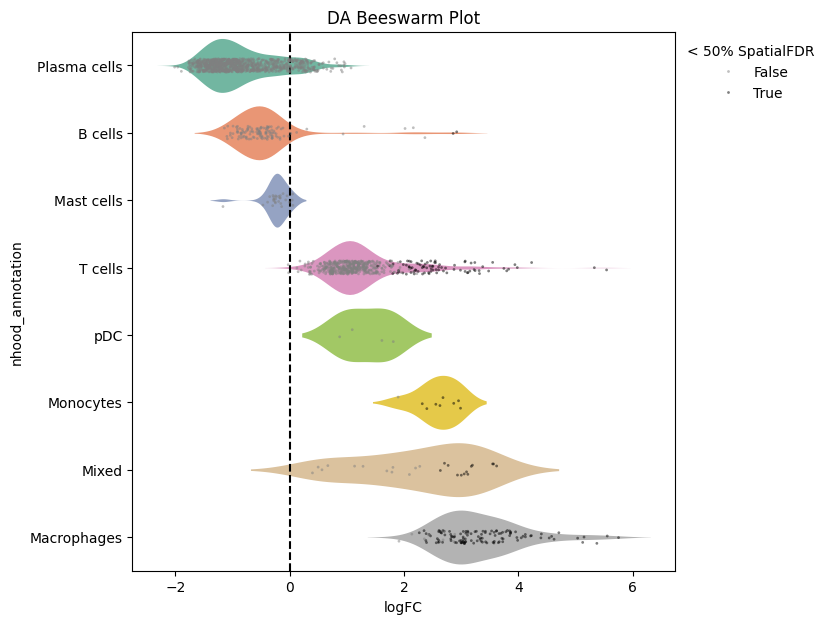

In [40]:

# 绘制图像
ax = milo.plot_da_beeswarm(mdata, alpha=0.5, palette="Set2")

# 设置标题和标签（如果需要）
ax.set_title("DA Beeswarm Plot")
ax.set_xlabel("logFC")
ax.set_ylabel("nhood_annotation")

# 保存图像
plt.savefig("da_beeswarm_plot.pdf", dpi=300)

plt.show()